In [21]:
%matplotlib inline

DATA_PATH = r'C:\Users\Administrator\Desktop\주식코인 예측스터디\3주차\\'

# Unzip Data
# It will take more than 5 min
import zipfile
import io

zf = zipfile.ZipFile(DATA_PATH+"orderbook_data.zip", "r")
zf.extractall(DATA_PATH)

In [22]:
currency_types = ["btc"]

In [23]:
import pandas as pd

main_df = pd.DataFrame() # begin empty

coin_price_dfs = pd.read_csv(DATA_PATH+"coin_price_dfs.csv")
orderbook_dfs = pd.read_csv(DATA_PATH+"orderbook_dfs.csv")    

coin_price_dfs = coin_price_dfs.sort_values(by=['timestamp','currency'])
orderbook_dfs = orderbook_dfs.sort_values(by=['timestamp','currency'])    

coin_price_dfs = coin_price_dfs[coin_price_dfs["currency"].isin(currency_types)]
orderbook_dfs = orderbook_dfs[orderbook_dfs["currency"].isin(currency_types)]

print(coin_price_dfs.shape)
print(orderbook_dfs.shape)

(34225, 15)
(34203, 213)


In [24]:
coin_price_dfs.head()

,timestamp,_id,completed_order_count,currency,date,errorCode,exchange,high,last,low,per,per_in_timestamp,start,timestamp.1,volume
1,2.560792e+07,5b94bf462f965e19effa16e7,2,btc,2018-09-09 15:35:49,0,coinone,7179000.0,7179000.0,7179000.0,minute,60,7179000.0,1536474949,0.1953
8,2.560792e+07,5b94bf822f965e19f2fa16e7,0,btc,2018-09-09 15:36:49,0,coinone,NaN,NaN,NaN,minute,60,NaN,1536475009,NaN
15,2.560792e+07,5b94bfbe2f965e19edfa16e7,10,btc,2018-09-09 15:37:49,0,coinone,7177000.0,7171000.0,7170000.0,minute,60,7171000.0,1536475069,1.3128
22,2.560792e+07,5b94bffa2f965e19f3fa16e7,5,btc,2018-09-09 15:38:49,0,coinone,7171000.0,7171000.0,7171000.0,minute,60,7171000.0,1536475129,0.5334
29,2.560792e+07,5b94c0362f965e19f0fa16e7,2,btc,2018-09-09 15:39:49,0,coinone,7171000.0,7171000.0,7171000.0,minute,60,7171000.0,1536475189,0.1500


In [25]:
orderbook_dfs.head()

,timestamp,_id,ask_price,ask_strength_0,ask_strength_1,ask_strength_10,ask_strength_11,ask_strength_12,ask_strength_13,ask_strength_14,...,bid_strength_98,bid_strength_99,currency,date,errorCode,exchange,num_bin,size_bin,timestamp.1,bid_ask_spread
1,25607915.85,5b94bf482f965e19effa1707,7179000.0,17.0771,0.6127,2.0002,0.0000,0.0,0.1067,0.0000,...,0.0,0.0,btc,2018-09-09 15:35:51,0,coinone,100,0.001,1536474951,8000.0
8,25607916.85,5b94bf842f965e19f2fa1707,7179000.0,17.0771,0.6127,2.0002,0.0000,0.0,0.1067,0.0000,...,0.0,0.0,btc,2018-09-09 15:36:51,0,coinone,100,0.001,1536475011,8000.0
15,25607917.85,5b94bfc02f965e19edfa1707,7171000.0,0.4857,18.1701,0.1546,2.0002,0.0,0.0000,0.1067,...,0.0,0.0,btc,2018-09-09 15:37:51,0,coinone,100,0.001,1536475071,1000.0
21,25607918.85,5b94bffc2f965e19f3fa1707,7171000.0,0.1540,18.1049,0.1546,2.3450,0.0,0.0000,0.1067,...,0.0,0.0,btc,2018-09-09 15:38:51,0,coinone,100,0.001,1536475131,1000.0
29,25607919.85,5b94c0382f965e19f0fa1707,7171000.0,0.0040,18.6041,0.1546,2.3450,0.0,0.0000,0.1067,...,0.0,0.0,btc,2018-09-09 15:39:51,0,coinone,100,0.001,1536475191,1000.0


## BTC Price Movements

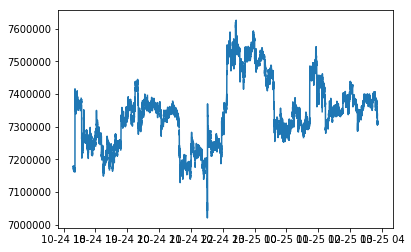

In [26]:
import matplotlib.pyplot as plt
import datetime
import pprint

BTC_PList = []
Time_Stamps = []

for i, r in coin_price_dfs[coin_price_dfs["currency"]=="btc"].iterrows():
    BTC_PList.append(r['last'])
    Time_Stamps.append(datetime.datetime.fromtimestamp(r["timestamp"]))
        
plt.plot(Time_Stamps,BTC_PList)
plt.show()

## Serieal Correlation Test

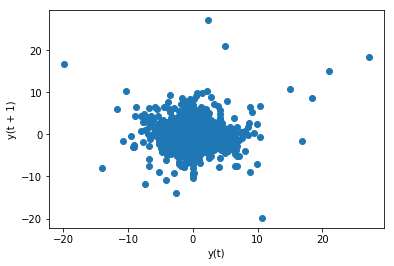

In [28]:
from pandas import Series
from matplotlib import pyplot
from pandas.plotting import lag_plot

import numpy as np

coin_price_dfs['last_return'] = coin_price_dfs['last'].pct_change()
coin_price_dfs['log_last_return'] = np.log(1 + coin_price_dfs['last_return'])

coin_price_dfs = coin_price_dfs.interpolate()

series = (coin_price_dfs["log_last_return"] - coin_price_dfs["log_last_return"].mean()) / (coin_price_dfs["log_last_return"].std())

lag_plot(series)
pyplot.show()

In [29]:
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000 -0.103941
t+1 -0.103941  1.000000


## Bid Ask Distribution

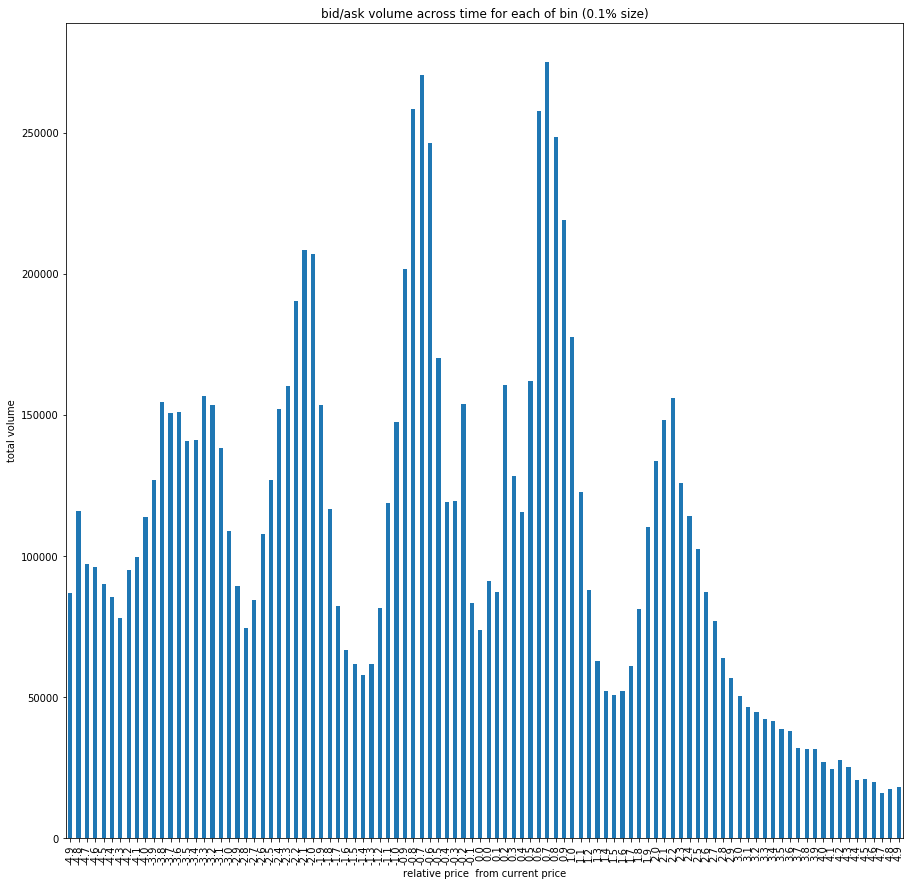

In [30]:
# 0 ~ 5 % bins from current price
bid_cols = ["bid_strength_"+str(i) for i in range(50)]
bid_cols.reverse()
# 0 ~ 5 % bins from current price
ask_cols = ["ask_strength_"+str(i) for i in range(50)]

xticks = list(range(50))
xticks.reverse()
xticks = [int(xtick)*-1 for xtick in xticks]

xticks.extend(list(range(50)))

xticks = [round(int(xtick)*0.1, 1) for xtick in xticks]

orderbook_features = bid_cols + ask_cols

ax = orderbook_dfs[orderbook_features].sum().plot.bar(figsize=(15,15), title='bid/ask volume across time for each of bin (0.1% size)')
ax.set_ylabel('total volume')
ax.set_xlabel('relative price  from current price')
ax = ax.set_xticklabels(xticks)
